In [40]:
%load_ext autoreload
%autoreload 2

import pandas as pd

import pygraphviz as pgv
    
from GraphUtils import PLSPMModel, GraphManipulations

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
data = pd.read_csv('soe_data.csv')
soe_cols = [c for c in data.columns if c.startswith('soe')]
image_cols = [c for c in data.columns if c.startswith('IMG')]

factor_cols = ['@input.Affinity', '@input.MeetNeeds', '@input.Dynamic', '@input.Unique']
mdf_cols = ['Meaningful', 'Salient', 'Different']
power_premium_cols = ['Power', 'Premium v2']

data.columns

Index(['id', 'brand', 'IMG01_', 'IMG02_', 'IMG03_', 'IMG04_', 'IMG05_',
       'IMG06_', 'IMG07_', 'IMG08_', 'IMG09_', 'IMG10_', 'IMG11_', 'IMG12_',
       'IMG13_', 'IMG14_', 'IMG15_', 'IMG16_', 'IMG17_', 'IMG18_', 'IMG19_',
       'IMG20_', 'IMG21_', 'IMG22_', 'IMG23_', 'IMG24_', 'IMG25_', 'IMG26_',
       '@input.Affinity', '@input.MeetNeeds', '@input.Dynamic',
       '@input.Unique', 'Meaningful', 'Salient', 'Different', 'M_F_I', 'D_F_I',
       'S_F_I', 'Power', 'Premium v2', 'soe.IMG01_', 'soe.IMG02_',
       'soe.IMG03_', 'soe.IMG04_', 'soe.IMG05_', 'soe.IMG06_', 'soe.IMG07_',
       'soe.IMG08_', 'soe.IMG09_', 'soe.IMG10_', 'soe.IMG11_', 'soe.IMG12_',
       'soe.IMG13_', 'soe.IMG14_', 'soe.IMG15_', 'soe.IMG16_', 'soe.IMG17_',
       'soe.IMG18_', 'soe.IMG19_', 'soe.IMG20_', 'soe.IMG21_', 'soe.IMG22_',
       'soe.IMG23_', 'soe.IMG24_', 'soe.IMG25_', 'soe.IMG26_'],
      dtype='object')

In [14]:
edges = [
    ('@input.MeetNeeds', 'Meaningful'),
    ('@input.MeetNeeds', 'Different'),
    ('@input.MeetNeeds', 'Salient'),
    
    ('@input.Affinity', 'Meaningful'),
    ('@input.Affinity', 'Different'),
    ('@input.Affinity', 'Salient'),

    ('@input.Dynamic', 'Meaningful'),
    ('@input.Dynamic', 'Different'),
    ('@input.Dynamic', 'Salient'),

    ('@input.Unique', 'Meaningful'),
    ('@input.Unique', 'Different'),
    ('@input.Unique', 'Salient'),

    ('Meaningful', 'Power'),
    ('Different', 'Power'),
    ('Salient', 'Power'),
]

In [74]:
mdl = PLSPMModel(edges)
#mdl.ConfgFromEdges(edges)
mdl.Fit(data)

In [75]:
coef = mdl.GetPathCoefs()
mdl.GetEdgeCoef(('Meaningful', 'Power'))

0.6885866297716134

In [66]:
G = GraphManipulations(edges)

In [67]:
G.Edges()

[('@input.MeetNeeds', 'Meaningful'),
 ('@input.MeetNeeds', 'Different'),
 ('@input.MeetNeeds', 'Salient'),
 ('Meaningful', 'Power'),
 ('Different', 'Power'),
 ('Salient', 'Power'),
 ('@input.Affinity', 'Meaningful'),
 ('@input.Affinity', 'Different'),
 ('@input.Affinity', 'Salient'),
 ('@input.Dynamic', 'Meaningful'),
 ('@input.Dynamic', 'Different'),
 ('@input.Dynamic', 'Salient'),
 ('@input.Unique', 'Meaningful'),
 ('@input.Unique', 'Different'),
 ('@input.Unique', 'Salient')]

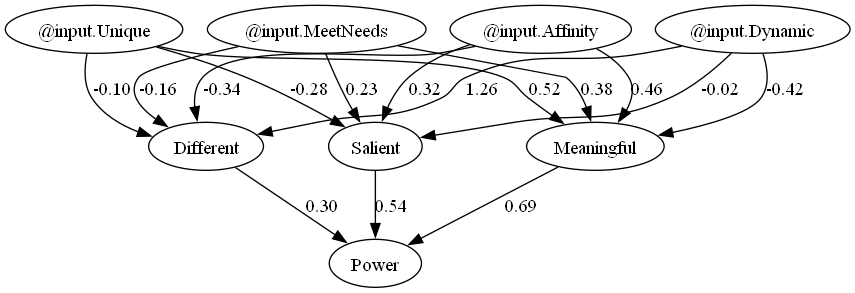

In [86]:
G.Plot()